
## Data Wrangling

The objective of this exercise is to explore the data for

1. __Completeness__ : Each record contains all the variables and records are unique
2. __Validity__: The value in the data is within permitted limits and the values are internally consistent.
3. __Accuracy__: Each value is a true representation of reality which it is intended to capture.
4. __Reasonableness__: Does the data make sense given business and process knowledge  ?
5. __Relationship between different datasets__ : As we have total 7 different datasets, we explore the relationship between them. 

While performing this exercise, we focus on understanding the business and processes in the context of predicting loan defaults.   
Finally, we will combine all datasets into one dataset where each application is one record. And each variable/feature that has information about the application will be one column.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


import missingno as msno
import pandas_profiling as pp
from pathlib import Path

%matplotlib inline
%precision %.2f

plt.style.use('bmh')
pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_columns', 100)

In [2]:
# Read data files
application = pd.read_csv('../data/raw/application_train.csv')
prev_application = pd.read_csv('../data/raw/previous_application.csv')
pos_cash_balance = pd.read_csv('../data/raw/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('../data/raw/credit_card_balance.csv')
installments_payments = pd.read_csv('../data/raw/installments_payments.csv')
bureau = pd.read_csv('../data/raw/bureau.csv')
bureau_balance = pd.read_csv('../data/raw/bureau_balance.csv')

The below diagram broadly demonstrates the relationship between these datasets.

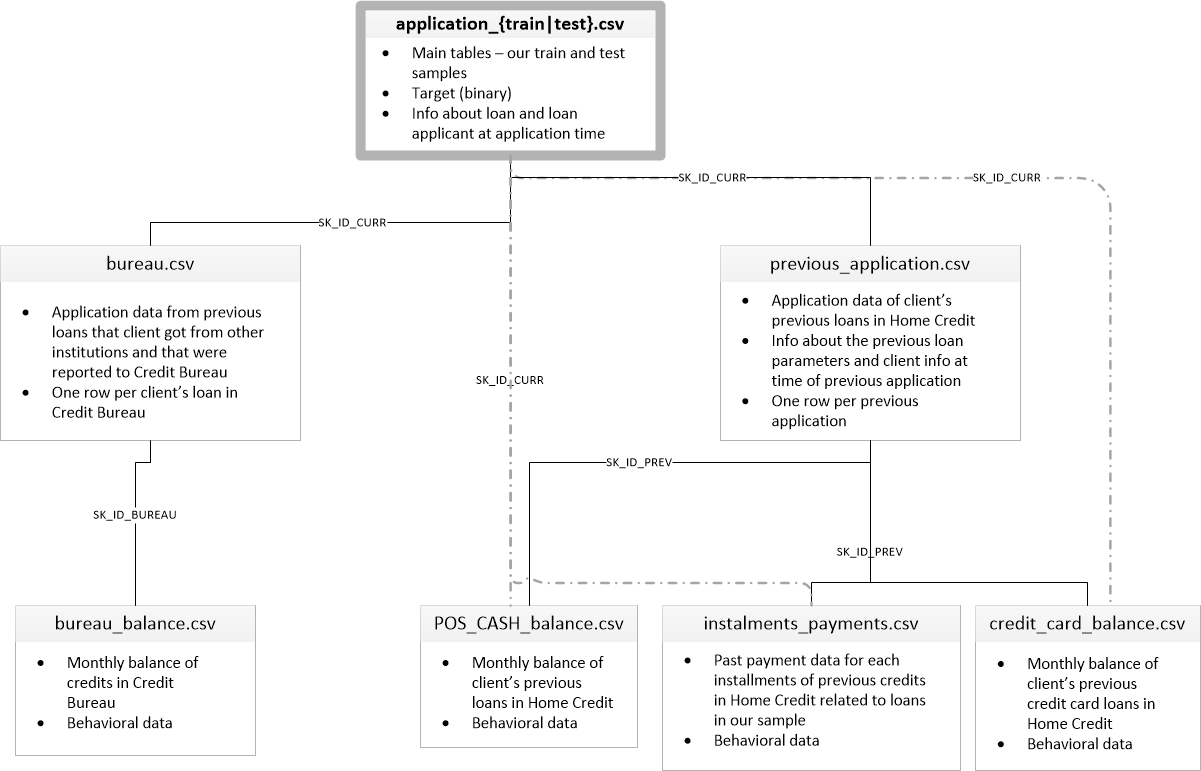

Let's examine each dataset in detail and their relationhip with the main __application__ dataset.

In [3]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

Converting all column names to lower case to keep Python code format consistent.

In [4]:
application.columns = [column.lower() for column in application.columns]
prev_application.columns = [column.lower() for column in prev_application.columns]
pos_cash_balance.columns = [column.lower() for column in pos_cash_balance.columns]
credit_card_balance.columns = [column.lower() for column in credit_card_balance.columns]
installments_payments.columns = [column.lower() for column in installments_payments.columns]
bureau.columns = [column.lower() for column in bureau.columns]
bureau_balance.columns = [column.lower() for column in bureau_balance.columns]

Let's look at number of observations & variables in each dataset.

In [5]:
df_data_shape = pd.DataFrame(list( (application.shape, 
 prev_application.shape, 
 pos_cash_balance.shape, 
 credit_card_balance.shape,
 installments_payments.shape, 
 bureau.shape, 
 bureau_balance.shape) ))
df_data_shape.columns = ['observations','variables']
df_data_shape.index = ['application','prev_application','pos_cash_balance','credit_card_balance',
                       'installments_payments','bureau','bureau_balance']
df_data_shape.index.name = 'Dataset'
df_data_shape.loc['total','observations'] = df_data_shape.observations.sum()
df_data_shape.loc['total','variables'] = df_data_shape.variables.sum()
df_data_shape

,observations,variables
Dataset,,
application,307511.0,122.0
prev_application,1670214.0,37.0
pos_cash_balance,10001358.0,8.0
credit_card_balance,3840312.0,23.0
installments_payments,13605401.0,8.0
bureau,1716428.0,17.0
bureau_balance,27299925.0,3.0
total,58441149.0,218.0


As we have 218 variables, we will use Pandas Profiling library to generate the data summary report. We will use these reports to gain a broad understanding and to identify any major issues in the data. In this notebook, we will document only the interesting findings and issues. Wherever required, we will explore the data in detail for better understanding.  

In [6]:
# application_pp = pp.ProfileReport(application,minimal=True)
# application_pp.to_file("../reports/data_wrangling/application.html")

In [7]:
# prev_application_pp = pp.ProfileReport(prev_application,minimal=True)
# prev_application_pp.to_file("../reports/data_wrangling/prev_application.html")

In [8]:
#pos_cash_balance_pp = pp.ProfileReport(pos_cash_balance,minimal=True)
#pos_cash_balance_pp.to_file("../reports/data_wrangling/pos_cash_balance.html")

In [9]:
#credit_card_balance_pp = pp.ProfileReport(credit_card_balance,minimal=True)
#credit_card_balance_pp.to_file("../reports/data_wrangling/credit_card_balance.html")

In [10]:
#installments_payments_pp = pp.ProfileReport(installments_payments,minimal=True)
#installments_payments_pp.to_file("../reports/data_wrangling/installments_payments.html")

In [11]:
#bureau_pp = pp.ProfileReport(bureau,minimal=True)
#bureau_pp.to_file("../reports/data_wrangling/bureau.html")

In [12]:
#bureau_balance_pp = pp.ProfileReport(bureau_balance,minimal=True)
#bureau_balance_pp.to_file("../reports/data_wrangling/bureau_balance.html")

### Application data 

In [13]:
application.sk_id_curr.is_unique

True

Application profile report indicates that we have high missing % in many columns.
Let us expore it in detail.

In [14]:
application_missing = pd.concat([application.isna().sum(),application.isna().mean()*100],axis=1)
application_missing.columns = ['missing_counts','missing_pct']
application_missing.sort_values(by = 'missing_counts',ascending = False,inplace=True)
col_missing = application_missing.missing_counts.gt(0)
print('Missing data in {} columns'.format(col_missing.sum()))
print('Top 10 missing columns are below')
application_missing.head(10)

Missing data in 67 columns
Top 10 missing columns are below


,missing_counts,missing_pct
commonarea_medi,214865,69.872297
commonarea_avg,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_mode,213514,69.432963
nonlivingapartments_avg,213514,69.432963
nonlivingapartments_medi,213514,69.432963
fondkapremont_mode,210295,68.386172
livingapartments_mode,210199,68.354953
livingapartments_avg,210199,68.354953
livingapartments_medi,210199,68.354953


The above top 10 missing columns capture information on clients's property, surroundings and location. And __they seem to be missing for same observations__. Let us understand this relationship.

In [15]:
application_missing.loc[col_missing,].index

Index(['commonarea_medi', 'commonarea_avg', 'commonarea_mode',
       'nonlivingapartments_mode', 'nonlivingapartments_avg',
       'nonlivingapartments_medi', 'fondkapremont_mode',
       'livingapartments_mode', 'livingapartments_avg',
       'livingapartments_medi', 'floorsmin_avg', 'floorsmin_mode',
       'floorsmin_medi', 'years_build_medi', 'years_build_mode',
       'years_build_avg', 'own_car_age', 'landarea_medi', 'landarea_mode',
       'landarea_avg', 'basementarea_medi', 'basementarea_avg',
       'basementarea_mode', 'ext_source_1', 'nonlivingarea_mode',
       'nonlivingarea_avg', 'nonlivingarea_medi', 'elevators_medi',
       'elevators_avg', 'elevators_mode', 'wallsmaterial_mode',
       'apartments_medi', 'apartments_avg', 'apartments_mode',
       'entrances_medi', 'entrances_avg', 'entrances_mode', 'livingarea_avg',
       'livingarea_mode', 'livingarea_medi', 'housetype_mode',
       'floorsmax_mode', 'floorsmax_medi', 'floorsmax_avg',
       'years_beginexpluatati

Looking at columns, it is clear that 
1.  __Target__ variable is present in all records.
2. From 'commonarea_medi' to 'emergencystate_mode' features in index list, all features belong to house, area and location except for 'own_car_age' and 'ext_source_1'. Plotting heatmap will reveal the relationship between these __property__/area related features.

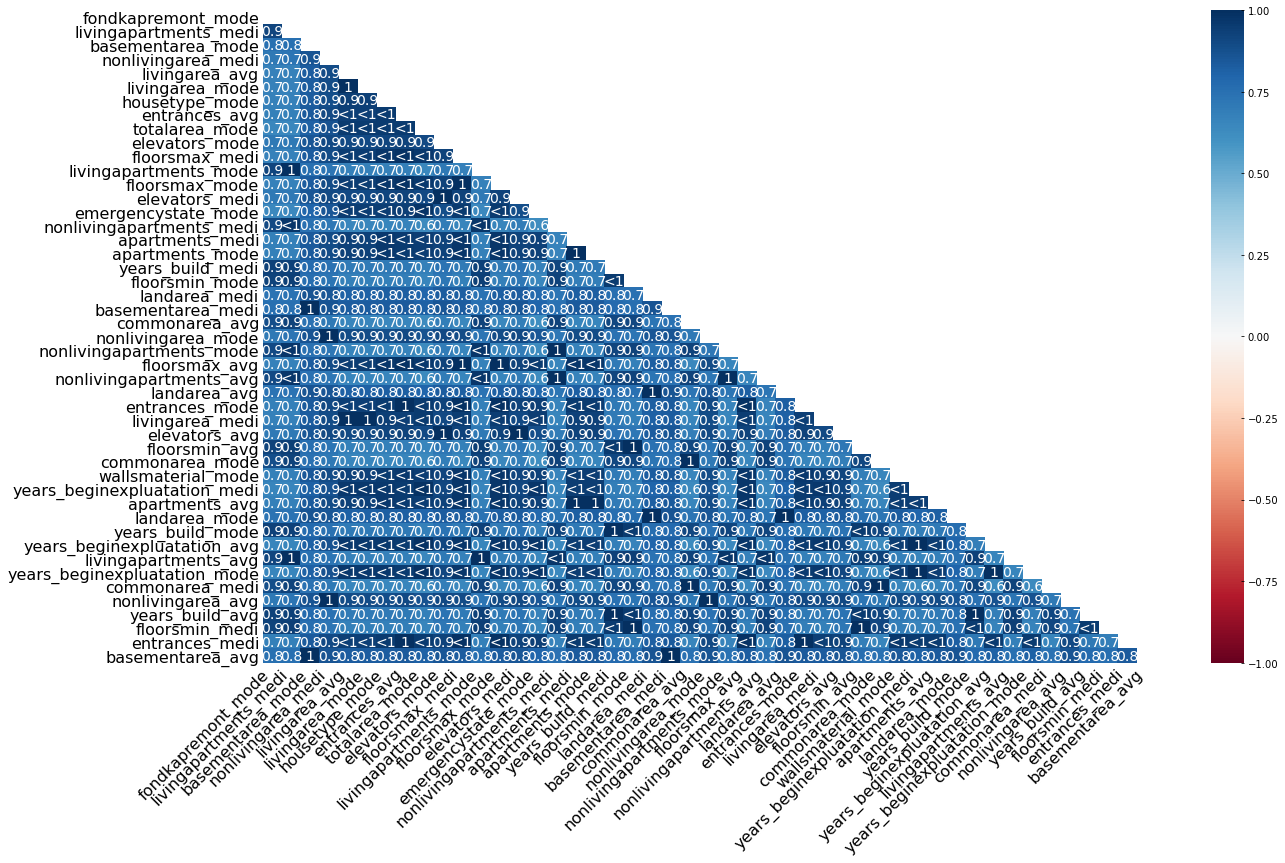

In [16]:
# to save plots
p = Path.cwd().parent / 'reports' / 'figures'
suffix ='.pdf'

area_missing_col = set(application_missing.loc[:'emergencystate_mode',].index) \
                .difference(set(['own_car_age','ext_source_1']))
msno.heatmap( application.loc[:, area_missing_col]);
plt.savefig(p / ('Property Features'+'.pdf') )

It is clear that living property and area features are largely missing in values for same observations. It is likely that these features are coming from same source and maybe related to another field in our data.   
Let us look at remaining __non-property__ features. I have included 'emergencystate_mode' feature as well to get an understanding of relationship of missing values between non-property and property related features. Due to high correlation between property features, including just one property feature will be a reasonable representation of rest of the features.

In [17]:
other_missing_col = set(application_missing.loc['emergencystate_mode':'days_last_phone_change'].index)\
                     .union(set(['own_car_age','ext_source_1']))
print('Count of other missing features {}'.format(len(other_missing_col)))
application_missing.loc[other_missing_col,].sort_values(by = 'missing_counts',ascending = False)

Count of other missing features 21


,missing_counts,missing_pct
own_car_age,202929,65.990810
ext_source_1,173378,56.381073
emergencystate_mode,145755,47.398304
occupation_type,96391,31.345545
ext_source_3,60965,19.825307
amt_req_credit_bureau_qrt,41519,13.501631
amt_req_credit_bureau_week,41519,13.501631
amt_req_credit_bureau_year,41519,13.501631
amt_req_credit_bureau_hour,41519,13.501631
amt_req_credit_bureau_day,41519,13.501631


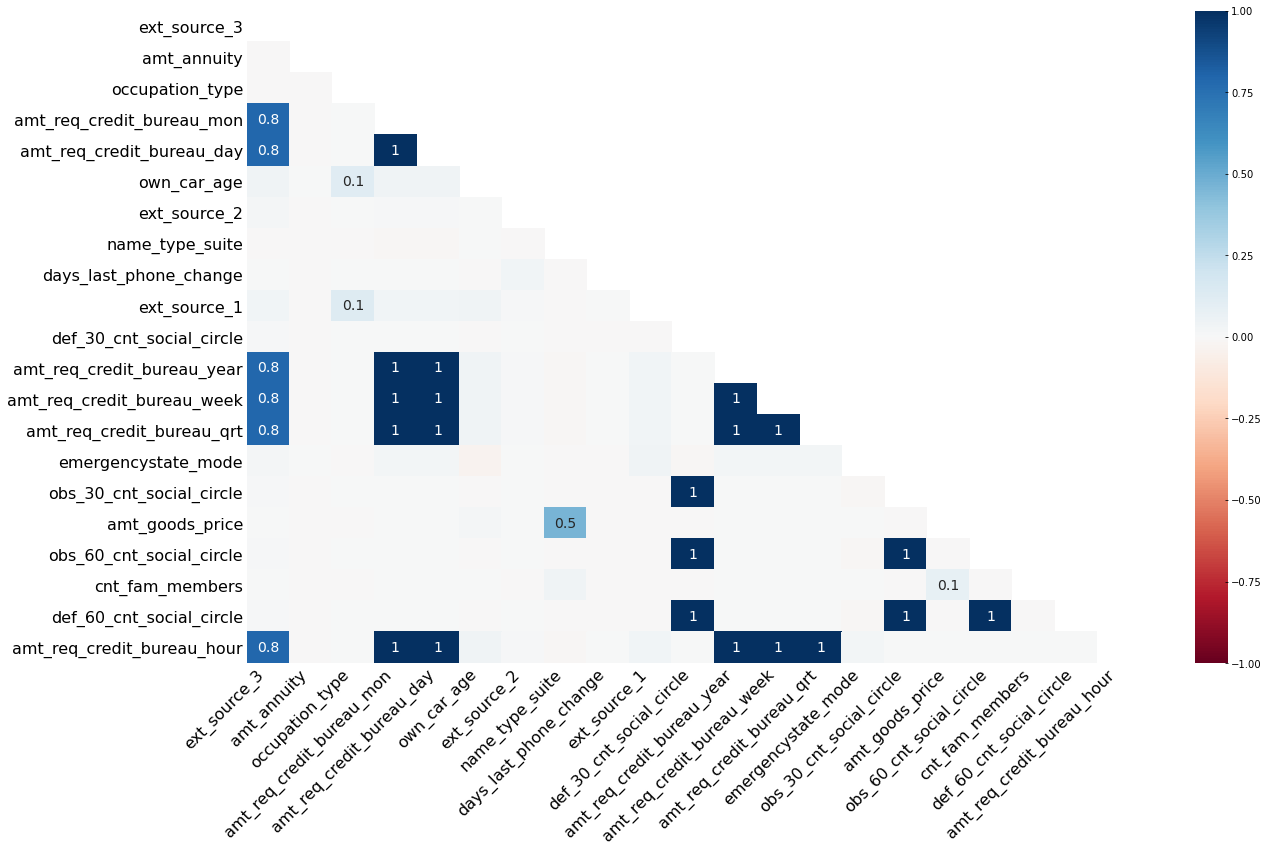

In [18]:
msno.heatmap( application.loc[:, other_missing_col]);

All enquiry related features are perfectly correlated in terms of missing values. All credit enquiry related features are perfectly correlated which makes sense as well. 'ext_source_3' is highly correlated with credit enquiry property.  
Property features are not correlated with other features.

In [19]:
application_missing.loc[['amt_annuity','amt_goods_price']]

,missing_counts,missing_pct
amt_annuity,12,0.003902
amt_goods_price,278,0.090403


Annuity is an important feature and ideally, it should be present for all loans. Though it is missing in just 12 records, it is important to note and ask the IT team. __We can delete these 12 records__ without affecting our predictions.   
Above heatmaps give us a fair idea about how values are missing in application data.

Let us look at validity and reasoanbleness of features.

In [20]:
# credit given should not be greater than good's price
bool_crd_gt_price = application.amt_credit.gt(application.amt_goods_price)
bool_crd_gt_price.sum()

198763

Usually , client pays some downpayment and borrows remaining part of goods price to pay for the goods.  
Home Credit clarifies in the discussion that it is quite possible as insurance cost is added to the loan amount.
If it is so, then how much high can the insurance cost be with respect to good's price ? Let's say insuance cost can go upto 50% of good's price.

In [21]:
crt_goodd_rt_insurance = 1.5
bool_high_credit = application.amt_credit.gt(application.amt_goods_price*crt_goodd_rt_insurance)
print('Count of loans where credit is 50% higher than goods price is {}'.format(bool_high_credit.sum()))

Count of loans where credit is 50% higher than goods price is 2564


These are < 1% of total loans. It would be worth to run a check with business to get better understanding of these records. Till then, we accept these records as it is.

Next we can look at client's age.

 Age  - minimmm : 20 maximum: 69


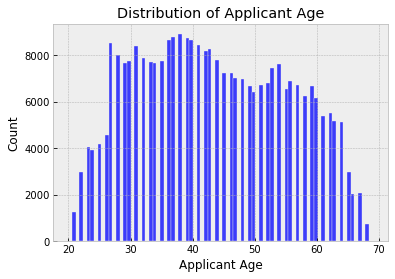

In [22]:
# client's age is in days. To convert it to years, divide it by 365.25
client_age = (application.days_birth/(-365.25)).astype(int)
print(" Age  - minimmm : {} maximum: {}".format(client_age.min(), client_age.max()))
sns.histplot(x=client_age);
plt.xlabel('Applicant Age');
plt.title('Distribution of Applicant Age')
plt.savefig(p / ('Distribution of Age'+'.pdf') )

Client's age looks valid and resonable.

In [23]:
application.name_family_status.value_counts(dropna=False)

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: name_family_status, dtype: int64

Family status has two values
1. Married
2. Civil Marriage  
It is worth checking the __accuracy__ of these two categories with business. Whether all clients were presented these two options and/or they were aware of the difference between two options or there is way to verify this field. If we do not have an answer, it may be worth to __combine these two categories into one__.

In [24]:
application.code_gender.value_counts()

F      202448
M      105059
XNA         4
Name: code_gender, dtype: int64

We have just 4 records of XNA gender. Hence, any analysis will not be credible for XNA. So, __we may combine XNA with F.__

What is the distribution of days employed ?

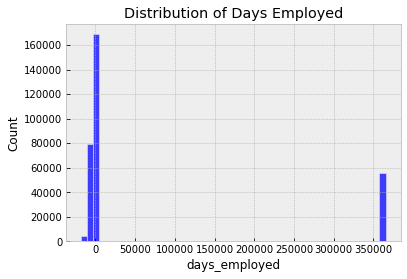

In [25]:
sns.histplot(x=application.days_employed,bins=50);
plt.title('Distribution of Days Employed')
plt.savefig(p / ('Distribution of Days Employed'+'.pdf') )

In [26]:
application.days_employed.value_counts().head()

 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: days_employed, dtype: int64

+365243 days or 1000 years does not seem to be a correct value as days are relative to application date, hence should be negative.   
Let us check what occupation this value represents

In [27]:
application.loc[application.days_employed == 365243,].occupation_type.value_counts(dropna=False)

NaN               55372
Cleaning staff        2
Name: occupation_type, dtype: int64

For this value, the occupation type is missing. Let is check what income type filed suggests.

In [28]:
application.loc[application.days_employed == 365243,].name_income_type.value_counts(dropna=False)

Pensioner     55352
Unemployed       22
Name: name_income_type, dtype: int64

Days employed is coded as 365243 for pensioners and unemployed people as number of observations exactly match with pensioners and unemployed counts. It is clear that this information is provided only for currently employed people. Hence, we can __replace this odd value 365243 with nan__ because we do not have actual information and days employed could be different for different pensioners.  
Let's exclude these records and check distribution of days employed.

 Years Employed  minimmm : 0 maximum: 49


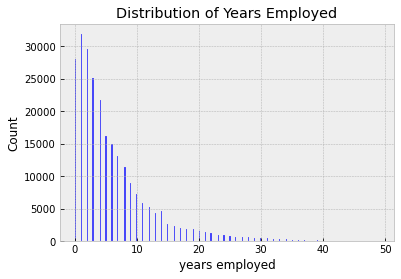

In [29]:
employed_years = (application.loc[application.days_employed != 365243,].days_employed/(-365.25)).astype(int)
print(" Years Employed  minimmm : {} maximum: {}".format(employed_years.min(), employed_years.max()))
sns.histplot(x=employed_years)
plt.xlabel('years employed');
plt.title('Distribution of Years Employed');
plt.savefig(p / ('Distribution of Years Employed'+'.pdf') )

The distribution seems sensible. Finally, days employed should be more than days birth.

In [30]:
# Days are negative values, hence 
(application.days_employed > application.days_birth).mean()*100

100.0

We have 66% missing values in 'own_car_age'.

In [31]:
application_missing.loc['own_car_age',:]

missing_counts    202929.00000
missing_pct           65.99081
Name: own_car_age, dtype: float64

We also have flag for if client owns a car. Ideally car age should be mising for those clients who do not own a car.  
And it seems to be the case !

In [32]:
bool_no_car = application.flag_own_car == 'N'
application_missing.loc['own_car_age',:][0] - application.loc[bool_no_car,'own_car_age'].isna().sum()

5.0

Now let's plot histogram of car's age for validation and reasonableness.

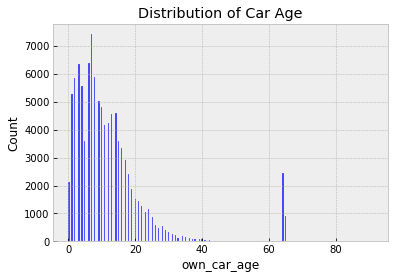

In [33]:
sns.histplot(x=application.own_car_age);
plt.title('Distribution of Car Age');
plt.savefig(p / ('Distribution of Car Age'+'.pdf') )

We have a good number of cars with age 64-65. This looks like a data aberration. Question here would be is it a verified field or declared field ? Are these vintage cars ? Is it that accidently people entered their own age instead of car's age ? Let's have a quick look at relationship between client's age and car's age.

More than 50 years old cars count 3361


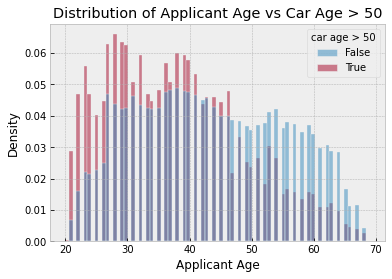

In [34]:
bool_car_age_gt_50 = application.own_car_age > 50
bool_car_age_gt_50.name = 'car age > 50'

print('More than 50 years old cars count {}'.format(bool_car_age_gt_50.sum()))
sns.histplot(x=client_age, hue = bool_car_age_gt_50,stat="density", common_norm=False);
plt.xlabel('Applicant Age');
plt.title('Distribution of Applicant Age vs Car Age > 50');
plt.savefig(p / ('Distribution of Applicant & Car Age'+'.pdf') )

Proportion of young drivers is higher than proportion of old drivers for '> 50 years old' cars.  We do not have any insight on why car age is higher based on above graph.

In [35]:
application.loc[application.housetype_mode.isna(),].flag_own_realty.value_counts()

Y    105531
N     48766
Name: flag_own_realty, dtype: int64

Housing related features are missing for both owned and not-owned realty 

In [36]:
application.amt_income_total.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
5%       6.750000e+04
10%      8.100000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
90%      2.700000e+05
95%      3.375000e+05
max      1.170000e+08
Name: amt_income_total, dtype: float64

The highest value for income is 117,000,000 seems odd when 95th percentile is 337,500.
Based on information by Home Credit, income represents monthly income. It is a self-declared field which is not verified. It can be a data entry error of additional zeros or inentionally, client had declared high income to avail the loan.

In [37]:
application.name_contract_type.value_counts(dropna=False,normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: name_contract_type, dtype: float64

__90%__ loans are cash loans.

### Previous Application data 


In [38]:
prev_application.sk_id_prev.is_unique

True

In [39]:
prev_application.head()

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
prev_application_missing = pd.concat([prev_application.isna().sum(),prev_application.isna().mean()*100],axis=1)
prev_application_missing.columns = ['missing_counts','missing_pct']
prev_application_missing.sort_values(by = 'missing_counts',ascending = False,inplace=True)
prev_app_col_missing = prev_application_missing.missing_counts.gt(0)
print('Missing data in {} columns'.format(prev_app_col_missing.sum()))
print('Top 10 missing columns are below')
prev_application_missing.head(10)

Missing data in 16 columns
Top 10 missing columns are below


,missing_counts,missing_pct
rate_interest_privileged,1664263,99.643698
rate_interest_primary,1664263,99.643698
amt_down_payment,895844,53.636480
rate_down_payment,895844,53.636480
name_type_suite,820405,49.119754
nflag_insured_on_approval,673065,40.298129
days_termination,673065,40.298129
days_last_due,673065,40.298129
days_last_due_1st_version,673065,40.298129
days_first_due,673065,40.298129


There is a pattern as many features are having same missing value %. It is highly likely that they are missing for some category of a feature. The pattern is clear in below heatmap. Let us expore this in detail.

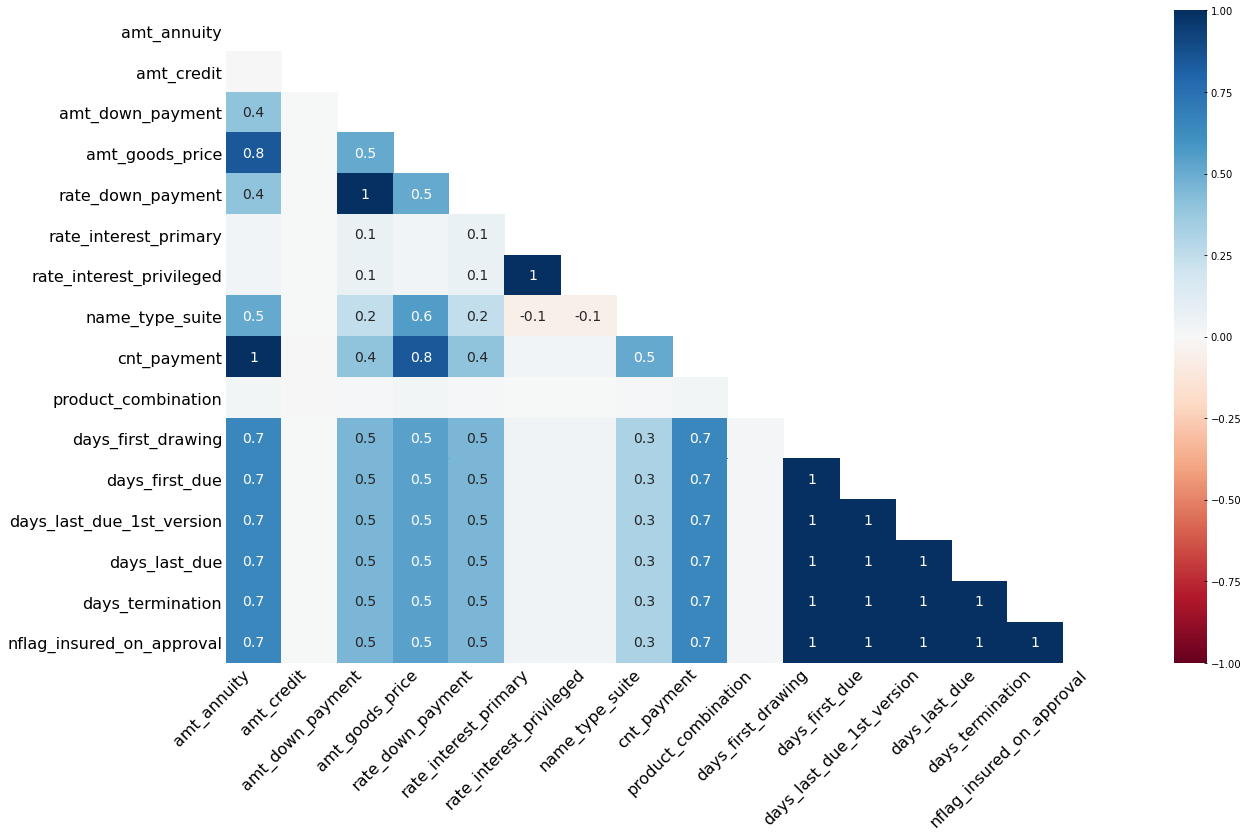

In [41]:
msno.heatmap( prev_application);

In [42]:
prev_application_missing.loc[prev_app_col_missing,].index

Index(['rate_interest_privileged', 'rate_interest_primary', 'amt_down_payment',
       'rate_down_payment', 'name_type_suite', 'nflag_insured_on_approval',
       'days_termination', 'days_last_due', 'days_last_due_1st_version',
       'days_first_due', 'days_first_drawing', 'amt_goods_price',
       'amt_annuity', 'cnt_payment', 'product_combination', 'amt_credit'],
      dtype='object')

In [43]:
prev_application_missing.loc['amt_annuity',]

missing_counts    372235.000000
missing_pct           22.286665
Name: amt_annuity, dtype: float64

Annuity feature has 22% missing values. Is it missing against non-approved loans ? Let's look at type of loans.

In [44]:
prev_application.name_contract_status.value_counts(dropna=False)

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: name_contract_status, dtype: int64

We have all types of loan data in previous applications. As per Home Credit, Canceled and unused offer loans are cancellations from client. Now we check the contract type in missing annuity rows.

In [45]:
missing_annuity = prev_application.amt_annuity.isna()
prev_application.loc[missing_annuity,:].name_contract_status.value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: name_contract_status, dtype: int64

Annuity is missing for most but not for all of the cancelled and unused loans. Against ~250k refused loans, annuity amount is present. It may be because non-approval can happen at different stages of application.

In [46]:
prev_application_missing.loc['amt_credit',]

missing_counts    1.00000
missing_pct       0.00006
Name: amt_credit, dtype: float64

In [47]:
zero_credit = prev_application.amt_credit == 0
print('Count of loans with zero credit amount: {}'.format(zero_credit.sum()))
prev_application.loc[zero_credit,:].name_contract_status.value_counts()

Count of loans with zero credit amount: 336768


Canceled        305566
Refused          29159
Approved          1551
Unused offer       492
Name: name_contract_status, dtype: int64

20% loans are having zero credit amount against them including 1551 approved loans. Let us look at contract type against those approved loans.

In [48]:
apv_with_zero_credit = (zero_credit & (prev_application.name_contract_status == 'Approved'))
prev_application.loc[apv_with_zero_credit,:].name_contract_type.value_counts(dropna=False)

Revolving loans    1551
Name: name_contract_type, dtype: int64

In [49]:
prev_application.name_contract_type.value_counts(dropna=False)

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: name_contract_type, dtype: int64

As per Home credit, Revolving loans include credit cards where credit purchase can be converted into a loan. Some are pre-approved for selected customers, allowing them to borrow whenever they want, up to an individual credit limit. This does not tell clearly why credit amount could be zero against 1551 revolving loans.  
Let us look at zero application amount aproved loans.

In [50]:
apv_with_zero_app_amt = ( (prev_application.amt_application==0) & (prev_application.name_contract_status== 'Approved'))
prev_application.loc[apv_with_zero_app_amt,].name_contract_type.value_counts()

Revolving loans    45304
Name: name_contract_type, dtype: int64

This may make sense as credit purchases are later converted into loan. so, application amount may be missing.

In [51]:
# credit given vs good's price
bool_prev_high_credit = prev_application.amt_credit.gt(application.amt_goods_price*1.5)
print('Count of loans where credit is 50% higher than goods price is {}'.format(bool_prev_high_credit.sum()))

Count of loans where credit is 50% higher than goods price is 29443


These are 1.8% of total previous loans. Again, it would be worth to run a check with business to get better understanding of why this would be a valid case.

Moving to seller place area feature, we have 46% records with -1 value. This does not make sense to have negative area. It may be the code for say online loans. Let's see if we can get any insight from channel or seller's industry type.

In [52]:
bool_seller_area = (prev_application.sellerplace_area == -1)
print('Count of loans with -1 seller place area : {}'
      .format(bool_seller_area.sum()))

Count of loans with -1 seller place area : 762675


In [53]:
(prev_application.loc[bool_seller_area,:]
 .name_seller_industry.value_counts(dropna=False))

XNA                     739130
Consumer electronics     21490
Connectivity               982
Furniture                  657
MLM partners               355
Industry                    36
Construction                23
Clothing                     2
Name: name_seller_industry, dtype: int64

97% of loans with -1 as seller place area belong to XNA industry.

Let's look at __days__ related features. days_first_due, days_last_due_1st_version, days_termination, days_last_due, days_first_drawing features are missing for same observations

In [54]:
col_days = (['days_first_due','days_last_due_1st_version','days_last_due',
             'days_termination','days_first_drawing'])
(prev_application[col_days].isna()
 .sum(axis=1) == len(col_days)).sum()/prev_application.shape[0]*100

40.29812946125467

In [55]:
( prev_application.loc[prev_application.days_first_drawing.isna(),]
 .name_contract_status.value_counts() )

Canceled        316319
Refused         290678
Approved         39632
Unused offer     26436
Name: name_contract_status, dtype: int64

These dates are largely missing for Non-Approved contracts which makes sense. And they are missing for just ~4% of total approved contracts. All the important dates features are missing for these loans at once. This may be a data issue.

In [56]:
anomaly_1st_drw = ( prev_application.loc[prev_application.days_first_drawing ==365243,]
                   .shape[0]/prev_application.shape[0]*100 )
print('{:.2f}% entries with value 365243'.format(anomaly_1st_drw))

55.95% entries with value 365243


In [57]:
( prev_application.loc[prev_application.days_first_drawing ==365243,]
 .name_contract_status.value_counts(dropna=False) )

Approved    934444
Name: name_contract_status, dtype: int64

365243 ie ~1000 years in future is an unrealistic date for first drawings. And all these are approved loans. Let's check this value in days_last_due_1st_version feature.

In [58]:
anomaly_last_due = ( prev_application.loc[prev_application.days_last_due_1st_version ==365243,]
                    .shape[0]/prev_application.shape[0]*100 )
print('{:.2f}% entries with value 365243'.format(anomaly_last_due))

5.62% entries with value 365243


days_last_due_1st_version value is 365243 for 5.6% of the records.  
Let us understand this by portfolio.

In [59]:
( prev_application.loc[prev_application.days_last_due_1st_version == 365243,]
 .name_contract_type.value_counts() )

Revolving loans    93759
Consumer loans       102
Cash loans             3
Name: name_contract_type, dtype: int64

These are __revolving loans__. Let's check rest of the revolving loans records for what date is present against them.

In [60]:
bool_revl_loans = prev_application.name_contract_type == 'Revolving loans'
(prev_application[bool_revl_loans].
 groupby(['name_contract_status','days_last_due_1st_version'],dropna=False).
 sk_id_prev.agg('size')).unstack()

days_last_due_1st_version,365243.0,NaN
name_contract_status,,
Approved,93759.0,4012.0
Canceled,NaN,45854.0
Refused,NaN,49534.0
Unused offer,NaN,5.0


Last due date(1st ver) is largely missing for Non approved revolving loans. For most of the approved revolving loans, it is 1000 years in future. Logically, for a revolving loan, there may not be a pre-defined last due day 1st version. Hence, it makes sense to use nan instead of 365243 value.

Let's check the first due date feature.

In [61]:
anomaly_first_due = (prev_application.loc
                     [prev_application.days_first_due ==365243,]
                     .shape[0]/prev_application.shape[0]*100)
print('{:.2f}% entries with value 365243'.format(anomaly_first_due))

2.43% entries with value 365243


In [62]:
fut_first_due = ( (prev_application.days_first_due ==365243) &
                 (prev_application.name_contract_type != 'Revolving loans') )
prev_application.loc[fut_first_due,].name_contract_type.value_counts()

Consumer loans    6917
Cash loans         449
Name: name_contract_type, dtype: int64

In [63]:
prev_application.loc[fut_first_due,].days_decision.describe(percentiles = [0.05, 0.1, 0.5, 0.9, 0.95])

count    7366.000000
mean      -29.494570
std        55.545326
min     -1259.000000
5%        -59.000000
10%       -42.000000
50%       -22.000000
90%        -7.000000
95%        -4.000000
max        -1.000000
Name: days_decision, dtype: float64

For 90% of the above contracts, the decision date is <= 42 days in the past, indicating that these are recently approved contracts. Hence, the first due date might fall in future which is indicated by 365243.   
Looking at below example where decision date is 276 days in the past, it is seems that client opted for the consumer loan but returned the goods in the store and practically did not take the loan. Hence, first due date does not make sense.

In [64]:
prev_application.loc[prev_application.sk_id_prev == 2286500,].head().days_decision

333   -276
Name: days_decision, dtype: int64

In [65]:
pos_cash_balance.loc[pos_cash_balance.sk_id_prev == 2286500,].name_contract_status

6462755    Returned to the store
Name: name_contract_status, dtype: object

Based on above analysis of different dates, it makes sense to __replace 365243 by nan value in these dates__ features. We will do that at the end of this exercise.

What is the distribution of number of previous loans aasociated with current loan id ?

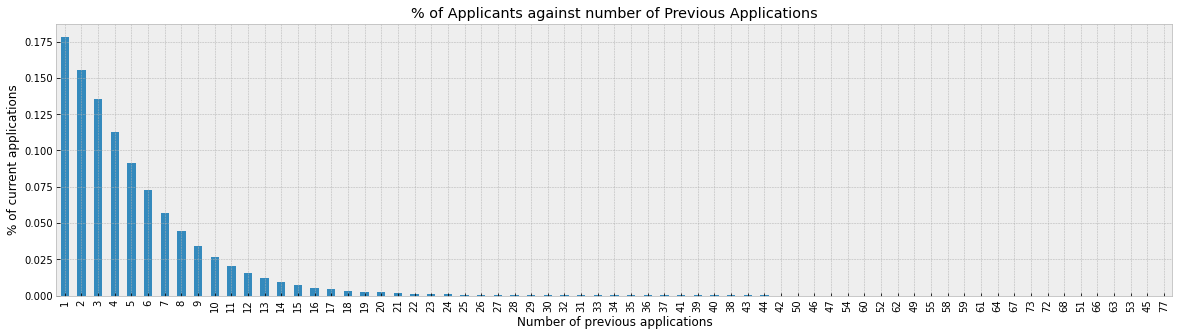

In [66]:
(prev_application.groupby('sk_id_curr').sk_id_prev.agg('count')
    .value_counts(normalize = True).
    plot(kind='bar',figsize = (20,5)))
plt.xlabel('Number of previous applications');
plt.ylabel('% of current applications');
plt.title('% of Applicants against number of Previous Applications')
plt.savefig(p / ('Distribution of Applicants against number of Previous Applications'+'.pdf') )

In [67]:
1 - prev_application.groupby('sk_id_curr').sk_id_prev.agg('count').value_counts(normalize = True).head(5).sum()

0.32654187459606854

In [68]:
most_repeat_client = prev_application.sk_id_curr.mode()
prev_application.loc[prev_application.sk_id_curr == most_repeat_client[0],].name_contract_status.value_counts()

Refused     64
Approved    10
Canceled     3
Name: name_contract_status, dtype: int64

As per previous application data, __33% of current applications are having more than 5 previous loans applications__. One customer has 77 applications with whooping 64 refusals.

In [69]:
application.sk_id_curr.isin(prev_application.sk_id_curr).mean()

0.9464929709831518

We have past applications history for __94.6%__ of the current applicants. 

### POS Cash Balances

In [70]:
pos_cash_balance.head()

,sk_id_prev,sk_id_curr,months_balance,cnt_instalment,cnt_instalment_future,name_contract_status,sk_dpd,sk_dpd_def
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [71]:
pos_key = (pos_cash_balance.sk_id_prev.astype('str') + 
           pos_cash_balance.months_balance.astype('str'))
pos_key.is_unique

True

POS data is complete except that it has 2 count installment features with 0.3% missing values. POS data has only count information and no amount information.    

Completed loan should not have future payments.

In [72]:
(pos_cash_balance.loc[pos_cash_balance.name_contract_status.eq('Completed'),:]
 .cnt_instalment_future.value_counts())

0.0     744879
8.0          2
10.0         1
7.0          1
Name: cnt_instalment_future, dtype: int64

In [73]:
application.sk_id_curr.isin(pos_cash_balance.sk_id_curr).mean()

0.9412476301660754

__94.1%__ of current applicants had applied for pos/cash loan in the past.

### Credit card balance

In [74]:
credit_card_balance.head()

,sk_id_prev,sk_id_curr,months_balance,amt_balance,amt_credit_limit_actual,amt_drawings_atm_current,amt_drawings_current,amt_drawings_other_current,amt_drawings_pos_current,amt_inst_min_regularity,amt_payment_current,amt_payment_total_current,amt_receivable_principal,amt_recivable,amt_total_receivable,cnt_drawings_atm_current,cnt_drawings_current,cnt_drawings_other_current,cnt_drawings_pos_current,cnt_instalment_mature_cum,name_contract_status,sk_dpd,sk_dpd_def
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [75]:
credit_key = credit_card_balance.sk_id_prev.astype('str') + credit_card_balance.months_balance.astype('str')
credit_key.is_unique

True

In [76]:
(credit_card_balance.isna().mean().round(3)*100).sort_values(ascending=False).head(10)

amt_payment_current           20.0
amt_drawings_atm_current      19.5
cnt_drawings_pos_current      19.5
amt_drawings_other_current    19.5
amt_drawings_pos_current      19.5
cnt_drawings_other_current    19.5
cnt_drawings_atm_current      19.5
cnt_instalment_mature_cum      7.9
amt_inst_min_regularity        7.9
sk_id_prev                     0.0
dtype: float64

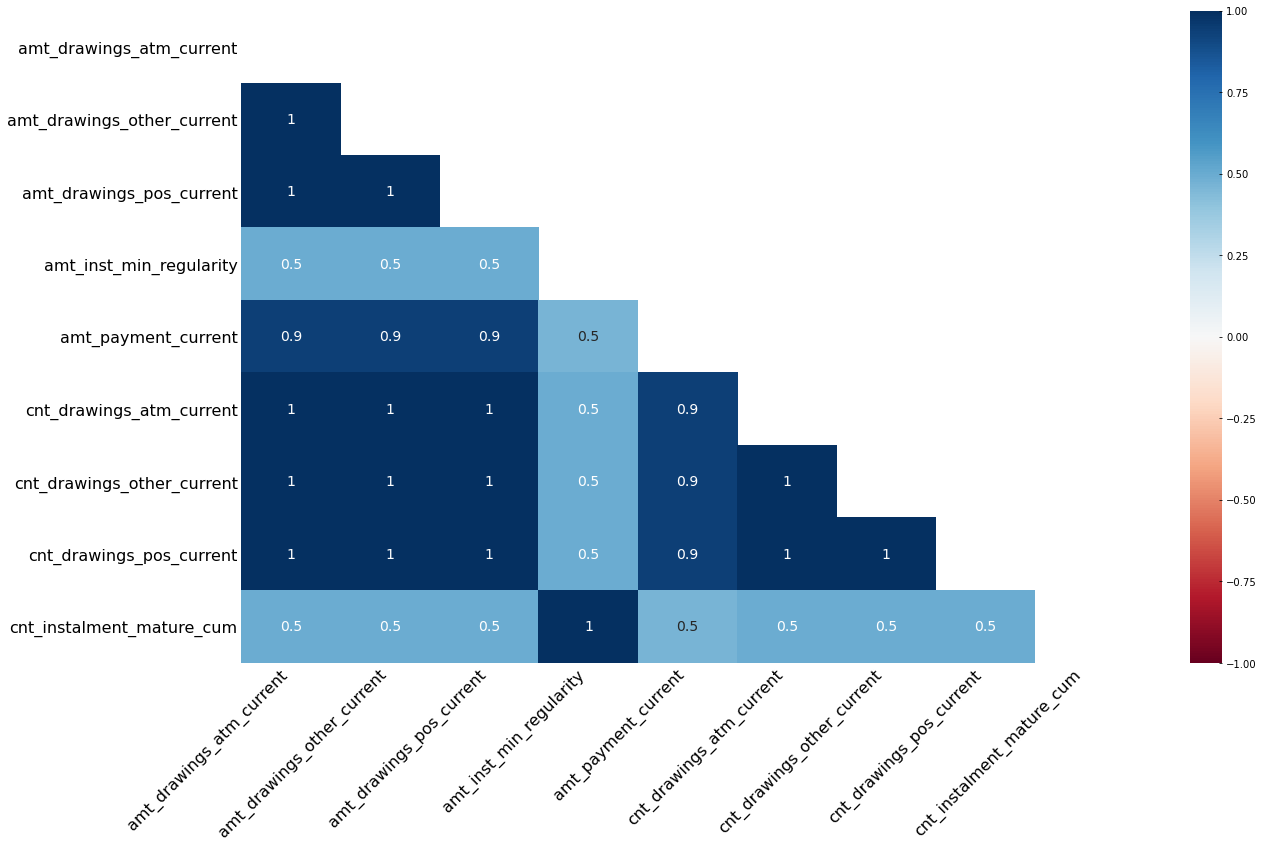

In [77]:
msno.heatmap( credit_card_balance);

Amount & count drawings during the month are almost perfectly related to each other in terms of missing values.
Amount payment current feature is 90% correlated with Amount & count drawings features.

We have ~20% missing data in both count and amount drawings_atm_current,drawings_other_current, drawings_pos_current.
Also 20 % missing observation in amt_inst_min_regularity.

Based on description, current drawings is total of atm, pos & other drawings.   
cnt_drawings_current = cnt_drawings_atm_current + cnt_drawings_pos_current + cnt_drawings_other_current

In [78]:
match_cnt_current_drawings = (np.isclose(credit_card_balance.cnt_drawings_current,
                           credit_card_balance.loc[:,
                           ['cnt_drawings_atm_current', 'cnt_drawings_pos_current','cnt_drawings_other_current']]
                           .sum(axis=1)))
match_cnt_current_drawings.all()

True

Same would be the case for amounts.

In [79]:
match_amt_current_drawings = (np.isclose(credit_card_balance.amt_drawings_current,
        credit_card_balance.loc[:,
        ['amt_drawings_atm_current', 'amt_drawings_pos_current','amt_drawings_other_current']]
                           .sum(axis=1)))
print('Drawings Amount - mismatch in {0:.2f}% cases'.format((1- match_amt_current_drawings.mean())*100))

Drawings Amount - mismatch in 0.19% cases


We will ignore the mismatch given the few cases.

Amount balance is negative in few cases. These customers overpaid what they own. Hence, we get negative amount.

In [80]:
balance_neg = credit_card_balance.amt_balance.lt(0)
print('Negative Credit Balance - {0:.2f}% cases'.format(balance_neg.mean()*100))

Negative Credit Balance - 0.06% cases


In [81]:
credit_card_balance.sort_values(by=['sk_id_prev','months_balance']).head(10).T

,1375415,277653,2559582,2192275,2159094,1884819,952884,2192311,2204494,1720546
sk_id_prev,1000018,1000018,1000018,1000018,1000018,1000030,1000030,1000030,1000030,1000030
sk_id_curr,394447,394447,394447,394447,394447,361282,361282,361282,361282,361282
months_balance,-6,-5,-4,-3,-2,-8,-7,-6,-5,-4
amt_balance,38879.145,40934.07,44360.505,113862.285,136695.42,0.0,15583.635,33784.74,36885.285,59188.05
amt_credit_limit_actual,45000,45000,45000,135000,135000,45000,45000,45000,45000,135000
amt_drawings_atm_current,13500.0,0.0,0.0,13500.0,0.0,NaN,4500.0,0.0,0.0,0.0
amt_drawings_current,51042.645,2335.5,2032.56,69156.945,22827.33,0.0,31105.755,20212.65,6368.85,25312.05
amt_drawings_other_current,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
amt_drawings_pos_current,37542.645,2335.5,2032.56,55656.945,22827.33,NaN,26605.755,20212.65,6368.85,25312.05
amt_inst_min_regularity,0.0,2250.0,2250.0,2263.77,6206.67,0.0,0.0,0.0,2250.0,2250.0


In [82]:
application.sk_id_curr.isin(credit_card_balance.sk_id_curr).mean()

0.2826077766323806

__28.2%__ of the current applicants had applied for credit card in the past.  
Hence, __credit features when merged with application data will have large % of missing values.__

### Installment Data
While pos/cash & credit data are snapshot say at the end of the month, installment data is transactional with details at day level. This data does not have missing values.

In [83]:
installments_payments.head()

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [84]:
installments_payments_key = (installments_payments.sk_id_prev.astype('str') + 
                             installments_payments.num_instalment_version.astype('str') +
                             installments_payments.num_instalment_number.astype('str'))
installments_payments_key.is_unique

False

These records are not unique by simple combination of indentifiers.   
Let's check some examples

In [85]:
installments_payments.loc[installments_payments_key.duplicated(keep=False),:].head()

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
17,1410565,197687,1.0,1,-1037.0,-1048.0,12514.050,12510.450
30,1840786,175114,1.0,11,-476.0,-474.0,21179.700,21161.700
40,2270983,159586,0.0,30,-2022.0,-2046.0,9000.000,1800.000
47,1895324,131465,1.0,6,-1386.0,-1379.0,3229.065,3212.865


In [86]:
installments_payments.num_instalment_version.min(), installments_payments.num_instalment_version.max()

(0.00, 178.00)

In [87]:
installments_payments.num_instalment_number.min(), installments_payments.num_instalment_number.max()

(1, 277)

'num_instalment_version' is the version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed. It has 178 as the highest value.

In [88]:
application.sk_id_curr.isin(installments_payments.sk_id_curr).mean()

0.9483985938714388

We have some installment history of __94.8%__ of the current applicants.

### Bureau Data

In [89]:
bureau.sk_id_bureau.is_unique

True

In [90]:
bureau.head()

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [91]:
(bureau.days_credit_enddate/365).describe(percentiles = [0.025, 0.05, 0.5, 0.975, 0.99])

count    1.610875e+06
mean     1.398678e+00
std      1.368279e+01
min     -1.152329e+02
2.5%    -6.698630e+00
5%      -6.197260e+00
50%     -9.041096e-01
97.5%    3.515616e+01
99%      8.501096e+01
max      8.547671e+01
Name: days_credit_enddate, dtype: float64

We have extreme values like 115 years in the past & 85 years in future for credit end date. This values do not make sense. We have similar issue in days_enddate_fact & days_credit_update.

In [92]:
bureau.amt_annuity.isna().mean()*100

71.4734902949614

Annuity amount is missing against 71.5% loans.

In [93]:
bureau.amt_credit_max_overdue.describe(percentiles = [0.98, 0.99])

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
50%      0.000000e+00
98%      2.704515e+04
99%      4.198875e+04
max      1.159872e+08
Name: amt_credit_max_overdue, dtype: float64

We have 116 million as highest credit amount due whereas 42,000 as 99th percentile value.  
65% values are missing.

In [94]:
bureau.amt_credit_sum.describe(percentiles = [0.98, 0.99])

count    1.716415e+06
mean     3.549946e+05
std      1.149811e+06
min      0.000000e+00
50%      1.255185e+05
98%      2.392271e+06
99%      3.700916e+06
max      5.850000e+08
Name: amt_credit_sum, dtype: float64

We have 585 million as highest credit amount whereas 3.7 million as 99th percentile value.

In [95]:
bureau.amt_credit_sum_limit.describe(percentiles = [0.98, 0.99])

count    1.124648e+06
mean     6.229515e+03
std      4.503203e+04
min     -5.864061e+05
50%      0.000000e+00
98%      1.040494e+05
99%      1.996206e+05
max      4.705600e+06
Name: amt_credit_sum_limit, dtype: float64

### Bureau Balance data

This is monthly snapshot of the accounts. This data is complete.

In [96]:
bureau_balance.head()

,sk_id_bureau,months_balance,status
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [97]:
bureau_balance.status.value_counts(dropna=False)

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: status, dtype: int64

Numers are related to DPD. This is a valuable feature.

## Approach to merge Home Credit's historical data to current application

__POS/Cash__ loan dataset contains monthly history of each previous loan of the applicant. Hence, we will  
1. first __summarise__ the experience of each loan so that we have one row per loan
2. then __merge__ this data with __previous application data__.    

We will do the same for __credit__ & __installment__ data. Thus, this new previous application dataset will have additional information from POS, Credit & Installment datasets. We will derive some additional features in the combined dataset.

Then finally, we will __merge combined previous application with current application__ dataset.   
The applicant's recent financial well being may differ from her financial well being in the past. Hence, we will create features from the most recent loan and total loans seperately.

### Aggregating POS data

In [98]:
pos_per_curr_id = pos_cash_balance[['sk_id_curr','sk_id_prev']]
pos_per_curr_id.sort_values(['sk_id_curr','sk_id_prev'])
(pos_per_curr_id.loc[~ pos_per_curr_id.duplicated(),]
     .groupby('sk_id_curr')
     .sk_id_prev.agg('count')
    .value_counts(normalize = True)).head()

1    0.307592
2    0.254457
3    0.171498
4    0.107937
5    0.065885
Name: sk_id_prev, dtype: float64

Of the current loan applications which had pos/cash applications in the past, about __70%__ have more than 1 pos/cash previous loan applications.
Hence, we will summarize pos/cash balance at sk_id_prev. 

In [99]:
pos_col_sort = ['sk_id_curr','sk_id_prev','months_balance']
pos_cash_balance.sort_values(by = pos_col_sort,inplace= True)

In [100]:
pc_balance_grp = pos_cash_balance.groupby(['sk_id_curr','sk_id_prev'],as_index=False).agg(
                        # due days
                        pc_max_sk_dpd = pd.NamedAgg(column='sk_dpd', aggfunc='max'),
                        pc_max_sk_dpd_def = pd.NamedAgg(column='sk_dpd_def', aggfunc='max'),
                        # Contract status (complete,active etc) & count of loan transactions
                        pc_latest_contract_status = pd.NamedAgg(column='name_contract_status', aggfunc='last'),
                        pc_cnt_loan_entries = pd.NamedAgg(column = 'sk_id_prev', aggfunc = 'size')
                        )

In [101]:
pc_balance_grp.head()

,sk_id_curr,sk_id_prev,pc_max_sk_dpd,pc_max_sk_dpd_def,pc_latest_contract_status,pc_cnt_loan_entries
0,100001,1369693,0,0,Completed,5
1,100001,1851984,7,7,Completed,4
2,100002,1038818,0,0,Active,19
3,100003,1810518,0,0,Completed,8
4,100003,2396755,0,0,Active,12


In [102]:
del pos_per_curr_id

### Aggregating Credit data

In [103]:
credit_per_curr_id = credit_card_balance[['sk_id_curr','sk_id_prev']]
credit_per_curr_id.sort_values(['sk_id_curr','sk_id_prev'])
(credit_per_curr_id.loc[~ credit_per_curr_id.duplicated(),]
     .groupby('sk_id_curr')
     .sk_id_prev.agg('count')
    .value_counts(normalize = True))

1    0.992854
2    0.007069
3    0.000068
4    0.000010
Name: sk_id_prev, dtype: float64

Of the current loan applications which had credit applications in the past, about __99%__  loan applications have just 1 previous credit loan.

In [104]:
del credit_per_curr_id
credit_col_sort = ['sk_id_curr','sk_id_prev','months_balance']
credit_card_balance.sort_values(by = credit_col_sort,inplace= True)

In [105]:
cc_balance_grp = credit_card_balance.groupby(['sk_id_curr','sk_id_prev'],as_index=False).agg(
    # due days
    cr_max_sk_dpd = pd.NamedAgg(column='sk_dpd', aggfunc='max'),
    cr_max_sk_dpd_def = pd.NamedAgg(column='sk_dpd_def', aggfunc='max'),
    # Contract status (complete/active etc) & count of loan transactions/records
    cr_latest_contract_status = pd.NamedAgg(column='name_contract_status', aggfunc='last'),
    cr_cnt_loan_entries = pd.NamedAgg(column = 'sk_id_prev', aggfunc = 'size'),
    # amounts
    cr_max_amt_balance = pd.NamedAgg(column = 'amt_balance', aggfunc = 'max'),
    cr_mean_amt_balance = pd.NamedAgg(column = 'amt_balance', aggfunc = 'mean'),
    cr_max_amt_cr_limit = pd.NamedAgg(column = 'amt_credit_limit_actual', aggfunc = 'max'),
    cr_max_amt_inst_min = pd.NamedAgg(column = 'amt_inst_min_regularity', aggfunc = 'max'),
    cr_max_amt_payment_tot = pd.NamedAgg(column = 'amt_payment_total_current', aggfunc = 'max'),
    # counts
    cr_max_cnt_instal_cum = pd.NamedAgg(column = 'cnt_instalment_mature_cum', aggfunc = 'max'),
    cr_sum_cnt_drawings_curr = pd.NamedAgg(column = 'cnt_drawings_current', aggfunc = 'sum'),
    )

Below ratio features like balance to credit, payment to installment may contain information about pay back capacity of the client.

In [106]:
# Adding ratio features
cc_balance_grp = cc_balance_grp.assign( 
    cr_rt_max_balance_cr = cc_balance_grp.cr_max_amt_balance/cc_balance_grp.cr_max_amt_cr_limit,
    cr_rt_max_payment_inst = cc_balance_grp.cr_max_amt_payment_tot/cc_balance_grp.cr_max_amt_inst_min,
    )
cc_balance_grp.head()

,sk_id_curr,sk_id_prev,cr_max_sk_dpd,cr_max_sk_dpd_def,cr_latest_contract_status,cr_cnt_loan_entries,cr_max_amt_balance,cr_mean_amt_balance,cr_max_amt_cr_limit,cr_max_amt_inst_min,cr_max_amt_payment_tot,cr_max_cnt_instal_cum,cr_sum_cnt_drawings_curr,cr_rt_max_balance_cr,cr_rt_max_payment_inst
0,100006,1489396,0,0,Active,6,0.00,0.000000,270000,0.0,0.0,0.0,0,0.00000,NaN
1,100011,1843384,0,0,Active,74,189000.00,54482.111149,180000,9000.0,55485.0,33.0,4,1.05000,6.165000
2,100013,2038692,1,1,Active,96,161420.22,18159.919219,157500,7875.0,153675.0,22.0,23,1.02489,19.514286
3,100021,2594025,0,0,Completed,17,0.00,0.000000,675000,0.0,0.0,0.0,0,0.00000,NaN
4,100023,1499902,0,0,Active,8,0.00,0.000000,225000,0.0,0.0,0.0,0,0.00000,NaN


### Aggregating Installment data
As installment data is transactional, we create new features at transactional level and then aggregate those features.

In [107]:
instal = installments_payments.assign(
            # days
            payment_delay = (installments_payments.days_entry_payment - installments_payments.days_instalment),
            payment_advance = (installments_payments.days_instalment - installments_payments.days_entry_payment),
            # amounts
            payment_deficit = (installments_payments.amt_instalment - installments_payments.amt_payment),
            payment_surplus = (installments_payments.amt_payment - installments_payments.amt_instalment)
            )

instal.payment_delay.where(instal.payment_delay >=0,0,inplace=True)
instal.payment_advance.where(instal.payment_advance >=0,0,inplace=True)
instal.payment_deficit.where(instal.payment_deficit >= 0,0,inplace=True)
instal.payment_surplus.where(instal.payment_surplus >= 0,0,inplace=True)

In [108]:
# Indicator for deficit and surplus payments
instal = instal.assign(
            bool_payment_deficit = np.where(instal.payment_deficit > 0, 1, 0),
            bool_payment_surplus = np.where(instal.payment_surplus> 0, 1, 0)
            )

In [109]:
instal.sample(5)

,sk_id_prev,sk_id_curr,num_instalment_version,num_instalment_number,days_instalment,days_entry_payment,amt_instalment,amt_payment,payment_delay,payment_advance,payment_deficit,payment_surplus,bool_payment_deficit,bool_payment_surplus
13344087,2745368,400688,0.0,65,-1834.0,-1834.0,225.000,225.000,0.0,0.0,0.000,0.0,0,0
4817677,1444845,271888,1.0,4,-401.0,-397.0,30121.470,29169.135,4.0,0.0,952.335,0.0,1,0
6441775,2523781,205714,1.0,16,-122.0,-131.0,38376.765,38376.765,0.0,9.0,0.000,0.0,0,0
1557683,2327377,125136,1.0,5,-1198.0,-1208.0,4629.645,4480.425,0.0,10.0,149.220,0.0,1,0
7194345,2132613,288087,1.0,12,-304.0,-322.0,24206.265,24206.265,0.0,18.0,0.000,0.0,0,0


In [110]:
instal_col_sort = ['sk_id_curr','sk_id_prev','num_instalment_number']
instal.sort_values(by = instal_col_sort,inplace= True)

In [111]:
instal_grp = instal.groupby(['sk_id_curr','sk_id_prev'],as_index=False).agg(
        # days
        in_sum_payment_delay = pd.NamedAgg(column = 'payment_delay', aggfunc = 'sum'),
        in_sum_payment_advance = pd.NamedAgg(column = 'payment_advance', aggfunc = 'sum'),
        # counts
        in_cnt_payment = pd.NamedAgg(column = 'amt_payment', aggfunc = 'count'),
        in_cnt_payment_deficit = pd.NamedAgg(column = 'bool_payment_deficit', aggfunc = 'sum'),
        in_cnt_payment_surplus = pd.NamedAgg(column = 'bool_payment_surplus', aggfunc = 'sum'),
        in_cnt_version = pd.NamedAgg(column='num_instalment_version', aggfunc = 'nunique'),
        # amounts
        in_sum_payment_deficit = pd.NamedAgg(column = 'payment_deficit', aggfunc = 'sum'),
        in_sum_payment_surplus = pd.NamedAgg(column = 'payment_surplus', aggfunc = 'sum'),
        in_sum_instal = pd.NamedAgg(column = 'amt_instalment', aggfunc = 'sum'),
        in_sum_payment = pd.NamedAgg(column = 'amt_payment', aggfunc = 'sum')
            )

Ratios such as surplus/deficit payment to installment amount may indicate client's paying capacity and behaviour.

In [112]:
instal_grp = instal_grp.assign(
        in_rt_cnt_deficit_pmt = instal_grp.in_cnt_payment_deficit/instal_grp.in_cnt_payment,
        in_rt_cnt_surplus_pmt = instal_grp.in_cnt_payment_surplus/instal_grp.in_cnt_payment,
        in_rt_amt_deficit_inst = instal_grp.in_sum_payment_deficit/instal_grp.in_sum_instal,
        in_rt_amt_surplus_inst = instal_grp.in_sum_payment_surplus/instal_grp.in_sum_instal,
        )
instal_grp.head()

,sk_id_curr,sk_id_prev,in_sum_payment_delay,in_sum_payment_advance,in_cnt_payment,in_cnt_payment_deficit,in_cnt_payment_surplus,in_cnt_version,in_sum_payment_deficit,in_sum_payment_surplus,in_sum_instal,in_sum_payment,in_rt_cnt_deficit_pmt,in_rt_cnt_surplus_pmt,in_rt_amt_deficit_inst,in_rt_amt_surplus_inst
0,100001,1369693,0.0,62.0,4,0,0,2,0.0,0.0,29250.900,29250.900,0.0,0.0,0.0,0.0
1,100001,1851984,11.0,0.0,3,0,0,1,0.0,0.0,11945.025,11945.025,0.0,0.0,0.0,0.0
2,100002,1038818,0.0,388.0,19,0,0,2,0.0,0.0,219625.695,219625.695,0.0,0.0,0.0,0.0
3,100003,1810518,0.0,31.0,7,0,0,2,0.0,0.0,1150977.330,1150977.330,0.0,0.0,0.0,0.0
4,100003,2396755,0.0,81.0,12,0,0,1,0.0,0.0,80773.380,80773.380,0.0,0.0,0.0,0.0


In [113]:
del instal

#### Merging POS_Cash, Credit and Installment data with Previous Application dataset

In [114]:
prev_application.sk_id_curr.isin(pos_cash_balance.sk_id_curr).mean()

0.9957472515498014

In [115]:
prev_application.sk_id_curr.isin(credit_card_balance.sk_id_curr).mean()

0.4250096095470401

In [116]:
prev_application.sk_id_curr.isin(installments_payments.sk_id_curr).mean()

0.9986462812549769

In [117]:
prev_app_merged = prev_application.merge(pc_balance_grp,how='left',
                                         on=['sk_id_curr','sk_id_prev'],
                                         suffixes=(False, False))

In [118]:
prev_app_merged = prev_app_merged.merge(cc_balance_grp,how='left',
                                        on=['sk_id_curr','sk_id_prev'],
                                        suffixes=(False, False))

In [119]:
prev_app_merged = prev_app_merged.merge(instal_grp,how='left',
                                        on=['sk_id_curr','sk_id_prev'],
                                        suffixes=(False, False))

In [120]:
col_check = prev_app_merged.shape[1] - ( prev_application.shape[1] + pc_balance_grp.shape[1] 
                                         + cc_balance_grp.shape[1] +instal_grp.shape[1] - 6)
row_check =  prev_app_merged.shape[0] - prev_application.shape[0]  
print(col_check,row_check)

0 0


In [121]:
#del pc_balance_grp,cc_balance_grp,instal_grp
prev_app_merged.shape

(1670214, 68)

As discussed in dates analysis, we will __replace 365243 by nan value in following dates__ before we create new features based on these dates.

In [122]:
col_days = (['days_first_due','days_last_due_1st_version','days_last_due',
             'days_termination','days_first_drawing'])
for column in col_days:
    prev_app_merged[column].replace(365243, np.nan, inplace= True)

Now we will create some new ratio based features. Advance/delay in payment may reflect financial descipline of the client.

In [123]:
prev_app_merged['rt_credit_application'] = (prev_app_merged.amt_credit
                                               /prev_app_merged.amt_application)

prev_app_merged['rt_annuity_credit'] = (prev_app_merged.amt_annuity
                                               /prev_app_merged.amt_credit)

prev_app_merged['loan_durtn_1st_ver'] = (prev_app_merged.days_last_due_1st_version
                                            - prev_app_merged.days_first_due)

prev_app_merged['rt_payment_delay'] = (prev_app_merged.in_sum_payment_delay
                                          /prev_app_merged.loan_durtn_1st_ver)

prev_app_merged['rt_payment_advance'] = (prev_app_merged.in_sum_payment_advance
                                          /prev_app_merged.loan_durtn_1st_ver)

In [124]:
prev_app_merged.sort_values(['sk_id_curr','days_decision'],inplace= True)

In [125]:
prev_app_merged.head(10)

,sk_id_prev,sk_id_curr,name_contract_type,amt_annuity,amt_application,amt_credit,amt_down_payment,amt_goods_price,weekday_appr_process_start,hour_appr_process_start,flag_last_appl_per_contract,nflag_last_appl_in_day,rate_down_payment,rate_interest_primary,rate_interest_privileged,name_cash_loan_purpose,name_contract_status,days_decision,name_payment_type,code_reject_reason,name_type_suite,name_client_type,name_goods_category,name_portfolio,name_product_type,channel_type,sellerplace_area,name_seller_industry,cnt_payment,name_yield_group,product_combination,days_first_drawing,days_first_due,days_last_due_1st_version,days_last_due,days_termination,nflag_insured_on_approval,pc_max_sk_dpd,pc_max_sk_dpd_def,pc_latest_contract_status,pc_cnt_loan_entries,cr_max_sk_dpd,cr_max_sk_dpd_def,cr_latest_contract_status,cr_cnt_loan_entries,cr_max_amt_balance,cr_mean_amt_balance,cr_max_amt_cr_limit,cr_max_amt_inst_min,cr_max_amt_payment_tot,cr_max_cnt_instal_cum,cr_sum_cnt_drawings_curr,cr_rt_max_balance_cr,cr_rt_max_payment_inst,in_sum_payment_delay,in_sum_payment_advance,in_cnt_payment,in_cnt_payment_deficit,in_cnt_payment_surplus,in_cnt_version,in_sum_payment_deficit,in_sum_payment_surplus,in_sum_instal,in_sum_payment,in_rt_cnt_deficit_pmt,in_rt_cnt_surplus_pmt,in_rt_amt_deficit_inst,in_rt_amt_surplus_inst,rt_credit_application,rt_annuity_credit,loan_durtn_1st_ver,rt_payment_delay,rt_payment_advance
201668,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,NaN,-1709.0,-1499.0,-1619.0,-1612.0,0.0,0.0,0.0,Completed,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,62.0,4.0,0.0,0.0,2.0,0.0,0.0,29250.900,29250.900,0.0,0.0,0.0,0.0,0.957782,0.166099,210.0,0.00000,0.295238
892077,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,NaN,-565.0,125.0,-25.0,-17.0,0.0,0.0,0.0,Active,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,388.0,19.0,0.0,0.0,2.0,0.0,0.0,219625.695,219625.695,0.0,0.0,0.0,0.0,1.000000,0.051670,690.0,0.00000,0.562319
1223745,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,NaN,-2310.0,-1980.0,-1980.0,-1976.0,1.0,0.0,0.0,Active,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,81.0,12.0,0.0,0.0,1.0,0.0,0.0,80773.380,80773.380,0.0,0.0,0.0,0.0,0.989013,0.099000,330.0,0.00000,0.245455
1021650,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,NaN,-797.0,-647.0,-647.0,-639.0,0.0,0.0,0.0,Completed,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,67.0,6.0,0.0,0.0,1.0,0.0,0.0,387113.940,387113.940,0.0,0.0,0.0,0.0,1.033000,0.185200,150.0,0.00000,0.446667
575941,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,NaN,-716.0,-386.0,-536.0,-527.0,1.0,0.0,0.0,Completed,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,31.0,7.0,0.0,0.0,2.0,0.0,0.0,1150977.330,1150977.330,0.0,0.0,0.0,0.0,1.150980,0.094950,330.0,0.00000,0.093939
935548,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS

#### Aggregating entire previous application history at current application ID 
As we have merged previous application, pos/cash balance, credit balance and installment datasets into prev_app_merged dataset, we simply summarize this data at  sk_id_curr.

In [126]:
prev_app_merged.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval',
       'pc_max_sk_dpd', 'pc_max_sk_dpd_def', 'pc_latest_contract_status',
       'pc_cnt_loan_entries', 'cr_max_sk_dpd',

In [127]:
# converting from Y/N  to 1/0
prev_app_merged['nflag_last_appl_per_contract'] = np.where(
    prev_app_merged.flag_last_appl_per_contract == 'Y',1,0)

# replace 346 XNA values with  Cash loans to reduce cardinality 
prev_app_merged.name_contract_type.replace('XNA','Cash loans', inplace= True)

In [128]:
# gropuby does not have mode aggregate function.  Hence, defining it below
def grp_mode(s):
    return s.value_counts(dropna=False).index[0]

In [129]:
feature_grp ={ # amounts
            'amt_annuity' : ['mean','max','last'],
            'amt_credit' : ['mean','max','last'],
            'amt_down_payment' : ['mean','max','last'],
            'amt_goods_price' : ['mean','max'],
            'cr_max_amt_cr_limit' : ['max','last'],
            'cr_max_amt_balance' : ['max'],
            'cr_max_amt_payment_tot' : ['max'],
            # days
            'pc_max_sk_dpd' : ['max','last'],
            'pc_max_sk_dpd_def' : ['max','last'],
            'cr_max_sk_dpd' : ['max','last'],
            'cr_max_sk_dpd_def' : ['max','last'],
            'loan_durtn_1st_ver' : ['sum','mean'],
            'days_decision' : ['mean','last'],
            # ratios
            'cr_rt_max_balance_cr' : ['max'],
            'cr_rt_max_payment_inst' : ['max'],
            'in_rt_cnt_deficit_pmt' : ['mean','max'], 
            'in_rt_cnt_surplus_pmt' : ['mean','max'],
            'in_rt_amt_deficit_inst' : ['mean','max','last'], 
            'in_rt_amt_surplus_inst' : ['mean','max','last'],
            'rt_credit_application' : ['mean','max','last'],
            'rt_annuity_credit' : ['mean','max','last'],
            'rt_payment_delay' : ['mean','max','last'],
            'rt_payment_advance' : ['mean','max','last'],
            'rate_down_payment' : ['mean','max','last'],
            # counts
            'cnt_payment' : ['sum','mean'],
            'cr_sum_cnt_drawings_curr' : ['sum','mean'],
            'in_cnt_payment' : ['sum','mean'],
            'in_sum_payment_delay' : ['mean','max','last'],
            'in_sum_payment_advance' : ['mean','max','last'],
            'nflag_insured_on_approval' : ['sum'],
            'nflag_last_appl_per_contract' : ['sum'],
            'nflag_last_appl_in_day' : ['sum'],
            # categories
            'pc_latest_contract_status' : ['last'],
            'cr_latest_contract_status' : ['last'],
            'name_client_type' : ['last'],
            'name_yield_group' : [grp_mode,'last'],
            'name_payment_type' : [grp_mode,'last'],
            'product_combination' : ['last'],
            'name_type_suite' : ['last'],
            'channel_type' : [grp_mode,'last'],
            'name_payment_type' : [grp_mode,'last'],
            'code_reject_reason' : [grp_mode,'last']
}

In [130]:
# From Pandas Cookbook 1.X
def flatten_cols(df):
    df.columns = ['_'.join(x) for x in
        df.columns.to_flat_index()]
    return df 

In [131]:
prev_grp = prev_app_merged.groupby(['sk_id_curr']).agg(feature_grp).pipe(flatten_cols)

We have name_contract_type feature which indicates the kind of loan(cash/consumer/revolving etc) client had with Home Credit. We will convert name_contract_type feature into many columns where each column will contain the count of type of a loan client had.   
eg If a client had 2 consumer and 3 cash loans, then against that client, we will have 2 in count of consumer loan column and 3 in count of cash loans column. 
The function __pivot_cat__ does this job.

In [132]:
def pivot_cat(data,val,indx,column,func,prefix,fill_missing_by=None):
    """
    Create a dataframe using pivot where categories of a column are 
    new columns aggregated by a function.
    
    Keyword arguments:
    data -- DataFrame
    val -- column to aggregate using function
    indx -- column to group by
    column -- categorical column whose categories will be added as new column
    func -- function used to aggregate
    prefix -- prefix to be added to new column names
    fill_missing_by -- replace missing value with this value
    """
    cols = [val,indx,column]
    df = data[cols].pivot_table(values = val,index= indx,columns=column,
                                aggfunc=func,fill_value = fill_missing_by)
    df.columns = [prefix + '_' + col.replace(' ','_').lower() for col in df.columns ]
    return df.reset_index()

In [133]:
prev_contract_type = pivot_cat(data = prev_app_merged,val = 'sk_id_prev',indx = 'sk_id_curr',
        column = 'name_contract_type', func = 'count',prefix ='prev_cnt_ct',fill_missing_by =0)
prev_contract_status = pivot_cat(data = prev_app_merged,val = 'sk_id_prev',indx = 'sk_id_curr',
        column = 'name_contract_status',func = 'count',prefix ='prev_cnt_cs',fill_missing_by =0)
prev_product_type = pivot_cat(data = prev_app_merged,val = 'sk_id_prev',indx = 'sk_id_curr',
        column = 'name_product_type', func = 'count',prefix ='prev_cnt_pt',fill_missing_by =0)

In [134]:
cat_ft_data = [prev_contract_type,prev_contract_status,prev_product_type]
for cat_ft in cat_ft_data:
    prev_grp = prev_grp.merge(cat_ft,how='left',
                              on=['sk_id_curr'],suffixes=(False, False))

In [135]:
prev_grp.sample(5)

,sk_id_curr,amt_annuity_mean,amt_annuity_max,amt_annuity_last,amt_credit_mean,amt_credit_max,amt_credit_last,amt_down_payment_mean,amt_down_payment_max,amt_down_payment_last,amt_goods_price_mean,amt_goods_price_max,cr_max_amt_cr_limit_max,cr_max_amt_cr_limit_last,cr_max_amt_balance_max,cr_max_amt_payment_tot_max,pc_max_sk_dpd_max,pc_max_sk_dpd_last,pc_max_sk_dpd_def_max,pc_max_sk_dpd_def_last,cr_max_sk_dpd_max,cr_max_sk_dpd_last,cr_max_sk_dpd_def_max,cr_max_sk_dpd_def_last,loan_durtn_1st_ver_sum,loan_durtn_1st_ver_mean,days_decision_mean,days_decision_last,cr_rt_max_balance_cr_max,cr_rt_max_payment_inst_max,in_rt_cnt_deficit_pmt_mean,in_rt_cnt_deficit_pmt_max,in_rt_cnt_surplus_pmt_mean,in_rt_cnt_surplus_pmt_max,in_rt_amt_deficit_inst_mean,in_rt_amt_deficit_inst_max,in_rt_amt_deficit_inst_last,in_rt_amt_surplus_inst_mean,in_rt_amt_surplus_inst_max,in_rt_amt_surplus_inst_last,rt_credit_application_mean,rt_credit_application_max,rt_credit_application_last,rt_annuity_credit_mean,rt_annuity_credit_max,rt_annuity_credit_last,rt_payment_delay_mean,rt_payment_delay_max,rt_payment_delay_last,rt_payment_advance_mean,rt_payment_advance_max,rt_payment_advance_last,rate_down_payment_mean,rate_down_payment_max,rate_down_payment_last,cnt_payment_sum,cnt_payment_mean,cr_sum_cnt_drawings_curr_sum,cr_sum_cnt_drawings_curr_mean,in_cnt_payment_sum,in_cnt_payment_mean,in_sum_payment_delay_mean,in_sum_payment_delay_max,in_sum_payment_delay_last,in_sum_payment_advance_mean,in_sum_payment_advance_max,in_sum_payment_advance_last,nflag_insured_on_approval_sum,nflag_last_appl_per_contract_sum,nflag_last_appl_in_day_sum,pc_latest_contract_status_last,cr_latest_contract_status_last,name_client_type_last,name_yield_group_grp_mode,name_yield_group_last,name_payment_type_grp_mode,name_payment_type_last,product_combination_last,name_type_suite_last,channel_type_grp_mode,channel_type_last,code_reject_reason_grp_mode,code_reject_reason_last,prev_cnt_ct_cash_loans,prev_cnt_ct_consumer_loans,prev_cnt_ct_revolving_loans,prev_cnt_cs_approved,prev_cnt_cs_canceled,prev_cnt_cs_refused,prev_cnt_cs_unused_offer,prev_cnt_pt_xna,prev_cnt_pt_walk-in,prev_cnt_pt_x-sell
157772,265944,4693.342500,7136.685,2250.000,40279.500,45000.0,45000.0,0.00,0.0,0.0,33880.50,33880.5,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,150.0,150.0,-2420.000000,-2300,NaN,NaN,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,inf,inf,inf,0.125350,0.200700,0.050000,0.053333,0.053333,0.053333,0.186667,0.186667,0.186667,0.000000,0.000000,0.0,6.0,3.00,0.0,NaN,6.0,6.0,8.000000,8.0,8.0,28.0,28.0,28.0,1.0,2,2,Completed,None,Repeater,high,XNA,Cash through the bank,XNA,Card X-Sell,Other_B,Contact center,Contact center,XAP,SCO,0,1,1,1,0,1,0,1,0,1
200714,311131,15134.248125,35553.915,5629.815,205686.675,353313.0,0.0,1584.00,7731.0,0.0,200897.25,353313.0,225000.0,225000.0,86983.65,86986.35,6.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1380.0,345.0,-978.400000,-96,0.386594,20.000517,0.111111,0.333333,0.0,0.0,0.055596,0.166731,0.000000,0.000000,0.000000,0.000000,inf,inf,1.0000,0.079639,0.182159,0.182159,0.035266,0.107407,0.000000,0.306055,0.673333,0.673333,0.039913,0.217920,0.0,122.0,15.25,9.0,9.0,97.0,19.4,9.400000,29.0,0.0,65.4,101.0,101.0,1.0,10,10,Completed,Active,Repeater,low_action,XNA,Cash through the bank,XNA,Cash,Family,Regional / Local,Contact center,XAP,XAP,1,8,1,6,1,3,0,9,1,0
183669,293178,10759.140000,29440.800,29440.800,113946.000,512370.0,0.0,3564.00,5274.0,0.0,125937.00,450000.0,NaN,NaN,NaN,NaN,483.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,690.0,230.0,-1365.666667,-279,NaN,NaN,0.452140,0.888889,0.0,0.0,0.226050,0.444458,0.142858,0.000000,0.000000,0.000000,0.993097,1.1386,1.1386,0.126516,0.184920,0.057460,0.731111,1.903704,0.026667,0.498272,0.714815,0.613333,0.079833,0.108983,0.0,72.0,14.40,0.0,NaN,36.0,12.0,196.333333,514.0,4.0,110.0,193.0,92.0,0.0,6,6,Completed,None,Repeater,high,XNA,Cash through the bank,XNA,Cash,"Spouse, partner",Stone,Credit and cash offices,XAP,XAP,2,4,0,3,1,2,0,5,0,1
60

In [136]:
# check for expected vs actual number of observations/rows
prev_application.sk_id_curr.nunique() - prev_grp.shape[0]

0

### Merge previous loan summary data to current loan data

In [137]:
application.sk_id_curr.isin(prev_grp.sk_id_curr).mean()*100

94.64929709831517

__94.6%__ applications are from existing clients and we have their details of previous applications.

In [138]:
app_merged = application.merge(prev_grp,how='left',
                              on=['sk_id_curr'],suffixes=(False, False))
app_merged.shape[0] - application.shape[0]

0

## Approach to add Bureau data to current application data
1. Firstly, we will summarize bureau balance data at each bureau loan
2. Then merge it with Bureau data.

Finally, we will summarize all the credit bureau applications belonging to current application in one row from Bureau data and then merge this dataset with application data.

In [139]:
bureau.sk_id_bureau.isin(bureau_balance.sk_id_bureau).mean()*100

45.114272197843434

Only __45%__ of bureau credits are present in bureau balances. This is because "monthly balances are not reported for some credits (actually for quite many, as you point out) and thus they are missing in the balance table."   
source : https://www.kaggle.com/c/home-credit-default-risk/discussion/57054

In [140]:
bureau_balance.sort_values(by=['sk_id_bureau','months_balance'],inplace=True)

In [141]:
bb_grp = bureau_balance.groupby(['sk_id_bureau'],as_index=False).agg(
        bb_last_loan_status = pd.NamedAgg(column = 'status', aggfunc = 'last'),
        bb_cnt_unique_loan_obs =  pd.NamedAgg(column = 'status', aggfunc = 'nunique')
        )

In [142]:
bb_grp.head()

,sk_id_bureau,bb_last_loan_status,bb_cnt_unique_loan_obs
0,5001709,C,2
1,5001710,C,3
2,5001711,X,2
3,5001712,C,2
4,5001713,X,1


#### Merging Bureau Balance data with Bureau data 

In [143]:
bc_merged = bureau.merge(bb_grp,how='left',on=['sk_id_bureau'],suffixes=(False, False))

In [144]:
# check - merged columns & rows 
print(bc_merged.shape[0] - bureau.shape[0])
print(bc_merged.shape[1] - (bureau.shape[1] + bb_grp.shape[1]-1) )

0
0


In [145]:
bc_merged.head()

,sk_id_curr,sk_id_bureau,credit_active,credit_currency,days_credit,credit_day_overdue,days_credit_enddate,days_enddate_fact,amt_credit_max_overdue,cnt_credit_prolong,amt_credit_sum,amt_credit_sum_debt,amt_credit_sum_limit,amt_credit_sum_overdue,credit_type,days_credit_update,amt_annuity,bb_last_loan_status,bb_cnt_unique_loan_obs
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN


In [146]:
bc_grp = bc_merged.groupby('sk_id_curr',as_index=False).agg(
            # counts
            bc_cnt_loans = pd.NamedAgg(column = 'sk_id_bureau', aggfunc = 'count'),
            bc_cnt_credit_type = pd.NamedAgg(column = 'credit_type', aggfunc = 'nunique'),
            bc_sum_cnt_credit_prolong = pd.NamedAgg(column = 'cnt_credit_prolong', aggfunc = 'sum'),
            # days
            bc_last_days = pd.NamedAgg(column = 'days_credit_update', aggfunc = 'max'),
            bc_amt_max_credit_overdue = pd.NamedAgg(column = 'amt_credit_max_overdue', aggfunc = 'max'),
            # status
            bb_last_loan_status = pd.NamedAgg(column = 'bb_last_loan_status', aggfunc = 'last'),
            bb_cnt_unique_loan_obs = pd.NamedAgg(column = 'bb_cnt_unique_loan_obs', aggfunc = 'count')
            )

We have credit_type column which indicates the kind of loan(credit,consumer,car etc) client opted for. We will convert credit_type feature into many columns where each column will contain the count of type of a loan client had.   
eg If a client had 2 consumer and 3 credit loans, then against that client, we will have 2 in count of consumer loan column and 3 in count of credit loans column. 
We will appply same logic to credit_active column.

Before we do this, we will reduce the levels/categories in two columns to top few.

In [147]:
for_credit_grp = ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage']
bc_merged['credit_type_fmt'] = bc_merged.credit_type.where(bc_merged.credit_type.isin(for_credit_grp),'Cr Type Others')
bc_merged.credit_type_fmt.value_counts()

Consumer credit    1251615
Credit card         402195
Car loan             27690
Mortgage             18391
Cr Type Others       16537
Name: credit_type_fmt, dtype: int64

In [148]:
credit_active_grp_fmt = ['Active', 'Closed']
bc_merged['credit_active_fmt'] = bc_merged.credit_active.where(bc_merged.credit_active.
                                            isin(credit_active_grp_fmt),'Cr Status Others')
bc_merged.credit_active_fmt.value_counts()

Closed              1079273
Active               630607
Cr Status Others       6548
Name: credit_active_fmt, dtype: int64

In [149]:
bc_cr_type = pivot_cat(data = bc_merged,val = 'sk_id_bureau',indx = 'sk_id_curr',
                column = 'credit_type_fmt',func = 'count',prefix ='bc_cnt',fill_missing_by =0)
bc_cr_type.head()

,sk_id_curr,bc_cnt_car_loan,bc_cnt_consumer_credit,bc_cnt_cr_type_others,bc_cnt_credit_card,bc_cnt_mortgage
0,100001,0,7,0,0,0
1,100002,0,4,0,4,0
2,100003,0,2,0,2,0
3,100004,0,2,0,0,0
4,100005,0,2,0,1,0


In [150]:
bc_cr_status = pivot_cat(data = bc_merged,val = 'sk_id_bureau',indx = 'sk_id_curr',
                column = 'credit_active_fmt',func = 'count',prefix ='bc_cnt',fill_missing_by =0)

Adding these columns to bureau data grouped at current loan id.

In [151]:
bc_grp = bc_grp.merge(bc_cr_type,how='left',on=['sk_id_curr'],suffixes=(False, False))
bc_grp = bc_grp.merge(bc_cr_status,how='left',on=['sk_id_curr'],suffixes=(False, False))
bc_grp.columns

Index(['sk_id_curr', 'bc_cnt_loans', 'bc_cnt_credit_type',
       'bc_sum_cnt_credit_prolong', 'bc_last_days',
       'bc_amt_max_credit_overdue', 'bb_last_loan_status',
       'bb_cnt_unique_loan_obs', 'bc_cnt_car_loan', 'bc_cnt_consumer_credit',
       'bc_cnt_cr_type_others', 'bc_cnt_credit_card', 'bc_cnt_mortgage',
       'bc_cnt_active', 'bc_cnt_closed', 'bc_cnt_cr_status_others'],
      dtype='object')

In [152]:
application.sk_id_curr.isin(bc_grp.sk_id_curr).mean()*100

85.68506492450678

__85.7%__ current loan applicants have some credit history with Bureau.  
Similarly only __35.7%__ of current loan applicants have some record of bureau balance.

In [153]:
app_merged = app_merged.merge(bc_grp,how='left',
                              on=['sk_id_curr'],suffixes=(False, False))
app_merged.shape[0] - application.shape[0]

0

In [154]:
app_merged.shape

(307511, 229)

Replacing gender XNA by Female and days_employed 365243 by nan. We may have infinity value in ratio features because of divide by 0. Hence, replaing it with nan.

In [155]:
app_merged.code_gender.replace('XNA', 'F', inplace= True)
app_merged.days_employed.replace(365243, np.nan, inplace= True)
app_merged.replace(np.inf, np.nan, inplace= True)

Deleting 12 records where annuity amount is missing.

In [156]:
combined = app_merged.loc[~app_merged.amt_annuity.isna(),].reset_index()
combined.shape

(307499, 230)

### Next Step
In the next notebook, we will perform Exploratory Data Analysis on this combined dataset to understand  
1. Distribution of features
2. Their relationship with target variable
3. Correlation between features.

Saving this dataset for EDA

In [157]:
combined_path = '../data/interim/combined.csv'
combined.to_csv(combined_path)

In [160]:
prev_app_merged.loc[prev_app_merged.sk_id_curr == 189820, 
                          ['sk_id_curr','sk_id_prev','in_sum_payment_delay','rt_payment_delay','loan_durtn_1st_ver']] 

,sk_id_curr,sk_id_prev,in_sum_payment_delay,rt_payment_delay,loan_durtn_1st_ver
1543174,189820,1873488,0.0,0.000000,150.0
466663,189820,2642072,34.0,0.049275,690.0


In [ ]:
prev_app_merged.loc[prev_app_merged.sk_id_curr == 189820, 
                          ['sk_id_curr','sk_id_prev','in_sum_payment_delay','rt_payment_delay','loan_durtn_1st_ver']] 

In [162]:
prev_grp.loc[prev_grp.sk_id_curr == 189820, ['sk_id_curr','rt_payment_delay_mean','rt_payment_delay_max', 'rt_payment_delay_last']]

,sk_id_curr,rt_payment_delay_mean,rt_payment_delay_max,rt_payment_delay_last
85440,189820,0.024638,0.049275,0.049275


In [163]:
prev_app_merged.loc[prev_app_merged.sk_id_curr == 189820, 
                          ['sk_id_curr','sk_id_prev','loan_durtn_1st_ver']] 

,sk_id_curr,sk_id_prev,loan_durtn_1st_ver
1543174,189820,1873488,150.0
466663,189820,2642072,690.0
